In [ ]:
# Crime Analysis_ Data Incubator application

Crime Responses is provided by the Gainesville Police Department (GPD) to document initial details surrounding an incident to which GPD officers respond. This dataset contains crime incidents from 2011 to present and includes a reduced set of fields focused on capturing the type of incident as well when and where an incident occurred.
Rows 160K; Columns 14
After clean the data, use Tableau to generate the Top 5 incidents report over years. 
https://public.tableau.com/profile/chunxiacao#!/vizhome/IncidentsReportedGainesville/Dashboard1?publish=yes
By Jupyter notebook:
Describe the dataset, generate overview of data, Establish classfication and  time series model to predict the top incident

In [1]:
import sys
import pandas as pd
import numpy as np
import sqlite3 as db
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import csv
from IPython.display import display
import seaborn as sns
print("Python version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("sqlite3 version: {}".format(db.version))
import matplotlib
print(matplotlib.__version__)
from datetime import datetime



Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.1
numpy version: 1.18.1
sqlite3 version: 2.6.0
3.1.3


# Descriptive Analytics


In [2]:
start = datetime.now()
df=pd.read_csv('Crime_Responses.csv')
print ("\nFive random records from the `df` table:")
display(df.iloc[np.random.choice (len (df), 5)])


Five random records from the `df` table:


,ID,Incident Type,Report Date,Offense Date,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,City,State,...,Longitude,Zip Code Boundaries,Location,2010 Census Tracts,Commission Districts,Gainesville Police Districts,Florida Census Zip Codes,Gainesville Enterprise Zone Boundaries,GPD Zones,Gainesville Fire Response Districts
67794,214003278,Theft Petit - Retail,02/19/2014 08:35:39 AM,01/16/2014 03:50:38 PM,8,Wednesday,15,Thursday,GAINESVILLE,FL,...,-82.375208,2.0,POINT (-82.375208 29.624637),21.0,3.0,3.0,767.0,NaN,7.0,3.0
74897,215017232,Theft Petit - Other,09/09/2015 09:04:12 PM,09/09/2015 06:10:00 PM,21,Wednesday,18,Wednesday,GAINESVILLE,FL,...,-82.328607,1.0,POINT (-82.328607 29.636184),11.0,1.0,1.0,772.0,NaN,16.0,1.0
24561,211011206,Found Property,06/02/2011 05:16:46 PM,06/02/2011 05:16:45 PM,17,Thursday,17,Thursday,GAINESVILLE,FL,...,-82.326727,1.0,POINT (-82.326727 29.652008),13.0,1.0,1.0,772.0,2.0,14.0,1.0
104511,216006609,Suspicious Incident,04/08/2016 07:20:41 PM,04/08/2016 03:00:00 AM,19,Friday,3,Friday,GAINESVILLE,FL,...,-82.288972,4.0,POINT (-82.288972 29.679854),19.0,1.0,2.0,766.0,NaN,11.0,2.0
45985,212015359,Robbery (home Invasion),07/29/2012 07:32:42 AM,07/29/2012 06:50:41 AM,7,Sunday,6,Sunday,GAINESVILLE,FL,...,-82.361664,2.0,POINT (-82.361664 29.632396),20.0,4.0,3.0,767.0,NaN,16.0,3.0


In [3]:
df.describe()

,ID,Report Hour of Day,Offense Hour of Day,Latitude,Longitude,Zip Code Boundaries,2010 Census Tracts,Commission Districts,Gainesville Police Districts,Florida Census Zip Codes,Gainesville Enterprise Zone Boundaries,GPD Zones,Gainesville Fire Response Districts
count,1.566190e+05,156619.000000,156619.000000,156619.000000,156619.000000,155506.000000,155512.000000,153257.000000,155476.000000,156039.000000,57048.000000,152206.000000,155476.000000
mean,2.392902e+08,12.399262,12.155588,29.654074,-82.341070,4.245077,16.159345,2.288515,4.099147,824.266754,2.163722,9.565287,4.099147
std,9.514101e+07,6.773426,7.222084,0.137342,0.135855,2.962734,11.444562,1.188326,3.511646,119.020887,0.615402,5.002588,3.511646
min,1.187000e+03,0.000000,0.000000,25.455473,-115.172957,1.000000,1.000000,1.000000,1.000000,763.000000,1.000000,1.000000,1.000000
25%,2.130045e+08,8.000000,7.000000,29.638711,-82.371144,2.000000,7.000000,1.000000,1.000000,767.000000,2.000000,5.000000,1.000000
50%,2.150142e+08,13.000000,13.000000,29.653792,-82.337605,4.000000,13.000000,2.000000,3.000000,770.000000,2.000000,10.000000,3.000000
75%,2.180018e+08,18.000000,18.000000,29.670726,-82.319362,7.000000,24.000000,3.000000,6.000000,772.000000,2.000000,14.000000,6.000000
max,9.214003e+09,23.000000,23.000000,44.243549,-71.013748,11.000000,45.000000,4.000000,12.000000,1085.000000,5.000000,18.000000,12.000000


In [4]:
df.columns

Index(['ID', 'Incident Type', 'Report Date', 'Offense Date',
       'Report Hour of Day', 'Report Day of Week', 'Offense Hour of Day',
       'Offense Day of Week', 'City', 'State', 'Address', 'Latitude',
       'Longitude', 'Zip Code Boundaries', 'Location', '2010 Census Tracts',
       'Commission Districts', 'Gainesville Police Districts',
       'Florida Census Zip Codes', 'Gainesville Enterprise Zone Boundaries',
       'GPD Zones', 'Gainesville Fire Response Districts'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

In [6]:
df.loc[df['City'].str.contains('gai',na=False, case=False), 'City'] = 'GAINESVILLE'
df.loc[df['City'].str.contains('GANI',na=False, case=False), 'City'] = 'GAINESVILLE'
df.loc[df['City'].str.contains('GVIL',na=False, case=False), 'City'] = 'GAINESVILLE'
df.loc[df['City'].str.contains('UNIV',na=False, case=False), 'City'] = 'GAINESVILLE'
df['Address']=df['Address'].replace({'BLK':''}, regex=True)
df.loc[df['City'].str.contains('UNIC',na=False, case=False), 'City'] = 'UNICORERATED'
df.loc[df['City'].str.contains('UNIN',na=False, case=False), 'City'] = 'UNICORERATED'
df.loc[df['City'].str.contains('ALACH',na=False, case=False), 'City'] = 'ALACHUA'
df.loc[df['City'].str.contains('COU',na=False, case=False), 'City'] = 'COUTNY'
df.loc[df['City'].str.contains('HAW',na=False, case=False), 'City'] = 'HAWTHORN'
df.loc[df['City'].str.contains('HIGH',na=False, case=False), 'City'] = 'HIGHSPRINGS'
df.loc[df['City'].str.contains('NEW',na=False, case=False), 'City'] = 'NEWBERRY'

In [7]:
len(set(df['City']))

73

GAINESVILLE      155445
UNICORERATED        232
COUTNY              201
ALACHUA             184
NEWBERRY            115
HIGHSPRINGS          85
HAWTHORN             81
ARCHER               55
MICANOPY             55
WALDO                28
DAYTONA BEACH        14
MELROSE               7
ST AUGUSTINE          7
ORANGE PARK           6
OCALA                 6
PANAMA CITY           5
BROOKER               4
WILLISTON             4
FT WHITE              4
ORLANDO               3
Name: City, dtype: int64

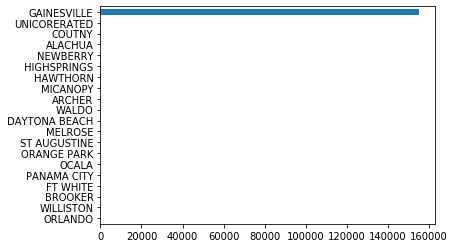

In [8]:
df.City.value_counts().iloc[:20].sort_values().plot(kind= 'barh')
df.City.value_counts().iloc[:20]

In [9]:
df.isnull().sum()

ID                                            0
Incident Type                                 0
Report Date                                   0
Offense Date                                  0
Report Hour of Day                            0
Report Day of Week                            0
Offense Hour of Day                           0
Offense Day of Week                           0
City                                         12
State                                         0
Address                                       0
Latitude                                      0
Longitude                                     0
Zip Code Boundaries                        1113
Location                                    580
2010 Census Tracts                         1107
Commission Districts                       3362
Gainesville Police Districts               1143
Florida Census Zip Codes                    580
Gainesville Enterprise Zone Boundaries    99571
GPD Zones                               

In [10]:
df['OffenseDate']=pd.to_datetime(df['Offense Date'])
df['ReportDate']=pd.to_datetime(df['Report Date'])
df['ODate']=df['OffenseDate'].dt.date
df['DOhour']=df['OffenseDate'].dt.strftime("%Y-%b-%d %H")
df['DOmonth']=df['OffenseDate'].dt.strftime("%Y-%b")
df['RDate']=df['ReportDate'].dt.date
df['DRhour']=df['ReportDate'].dt.strftime("%Y-%b-%d %H")
df['DRmonth']=df['ReportDate'].dt.strftime("%Y-%b")


In [11]:
df['delay']=df['ReportDate']-df['OffenseDate']

In [12]:
df.head(2)

,ID,Incident Type,Report Date,Offense Date,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,City,State,...,Gainesville Fire Response Districts,OffenseDate,ReportDate,ODate,DOhour,DOmonth,RDate,DRhour,DRmonth,delay
0,220002476,Dcf Investigations,02/14/2020 01:30:00 PM,01/20/2020 08:00:00 PM,13,Friday,20,Monday,GAINESVILLE,FL,...,2.0,2020-01-20 20:00:00,2020-02-14 13:30:00,2020-01-20,2020-Jan-20 20,2020-Jan,2020-02-14,2020-Feb-14 13,2020-Feb,24 days 17:30:00
1,220002482,Burglary to Residence,02/14/2020 04:38:50 PM,02/14/2020 01:00:00 PM,16,Friday,13,Friday,GAINESVILLE,FL,...,1.0,2020-02-14 13:00:00,2020-02-14 16:38:50,2020-02-14,2020-Feb-14 13,2020-Feb,2020-02-14,2020-Feb-14 16,2020-Feb,0 days 03:38:50


In [13]:
df.shape

(156619, 31)

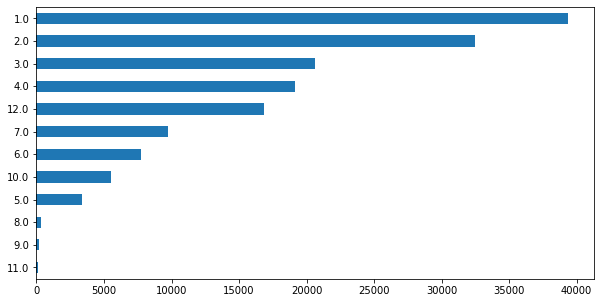

In [14]:
plt.figure(figsize=(10,5))
df['Gainesville Police Districts'].value_counts().iloc[:20].sort_values().plot(kind= 'barh')

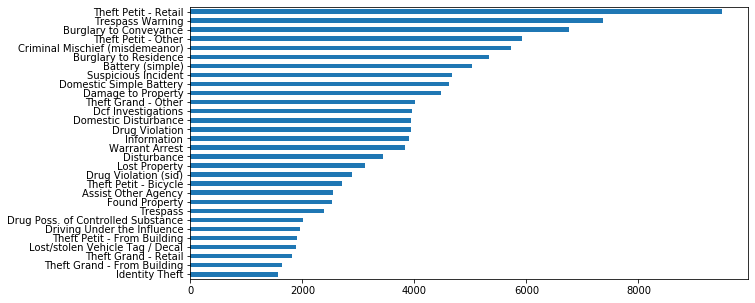

In [15]:
plt.figure(figsize=(10,5)) 
df['Incident Type'].value_counts().iloc[:30].sort_values().plot(kind= 'barh')

In [16]:
df['Oyear']=df['OffenseDate'].dt.strftime("%Y").astype(int)
df['Omonth']=df['OffenseDate'].dt.strftime("%m").astype(int)
df['Oday']=df['OffenseDate'].dt.strftime("%d").astype(int)

df['Ryear']=df['ReportDate'].dt.strftime("%Y").astype(int)
df['Rmonth']=df['ReportDate'].dt.strftime("%m").astype(int)
df['Rday']=df['ReportDate'].dt.strftime("%d").astype(int)

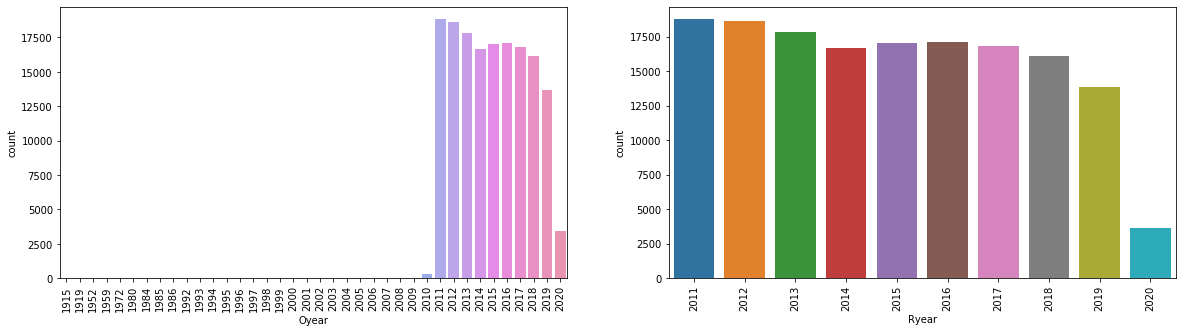

In [17]:
#categorical = [ 'Incident Type', 'DOhour', 'DOmonth', 'Oyear','ODate','RDate','Ryear']
categorical = [ 'Oyear','Ryear']
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [18]:
df=df.replace({'Monday':1, 'Saturday':6, 'Sunday':7, 'Thursday':4, 'Tuesday':2, 'Wednesday':3,'Friday':5})

df['Report Day of Week'] = df['Report Day of Week'].astype('category').cat.as_ordered()
df['Offense Day of Week'] = df['Offense Day of Week'].astype('category').cat.as_ordered()



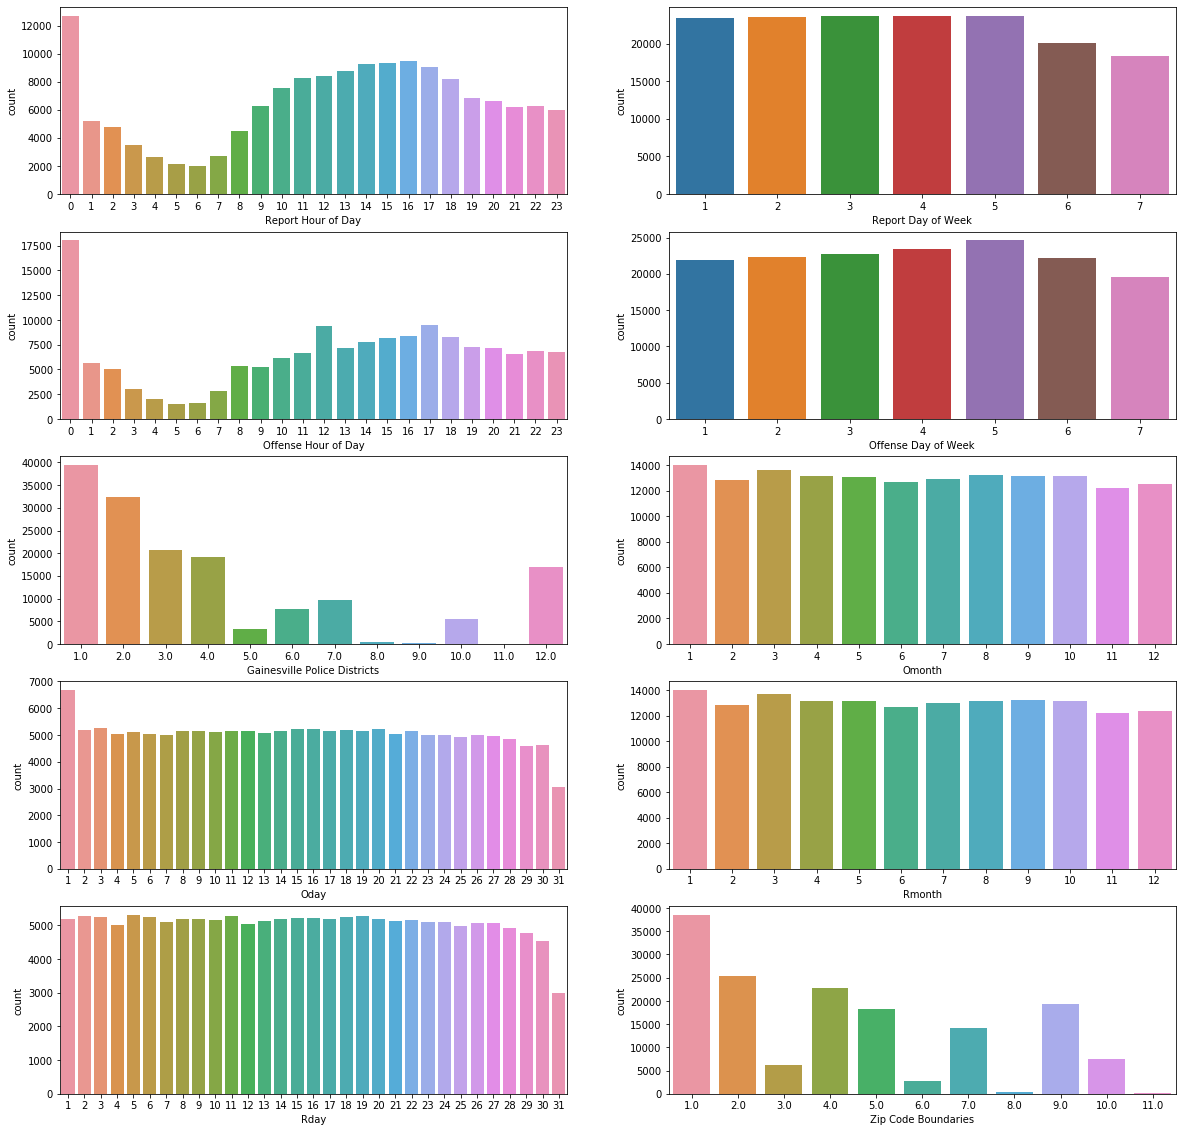

In [19]:
variableset2 = [ 'Report Hour of Day', 'Report Day of Week','Offense Hour of Day', 
'Offense Day of Week','Gainesville Police Districts','Omonth', 'Oday','Rmonth', 'Rday','Zip Code Boundaries']

fig, ax = plt.subplots(5, 2, figsize=(20, 20))
for variable, subplot in zip(variableset2, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)


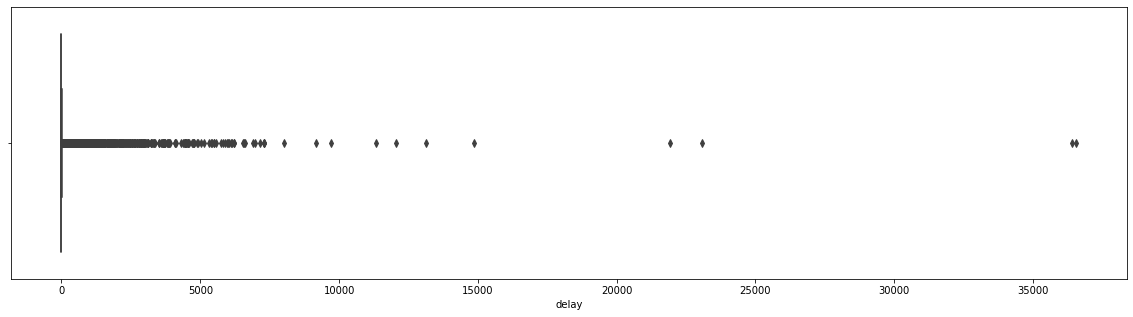

In [20]:

df['delay']=df['delay'] / np.timedelta64(1, 'D')

plt.figure(figsize=(20,5))
sns.boxplot(df['delay'])

In [21]:
df['ID'] = df['ID'].astype('category').cat.as_ordered()


In [22]:
df.columns

Index(['ID', 'Incident Type', 'Report Date', 'Offense Date',
       'Report Hour of Day', 'Report Day of Week', 'Offense Hour of Day',
       'Offense Day of Week', 'City', 'State', 'Address', 'Latitude',
       'Longitude', 'Zip Code Boundaries', 'Location', '2010 Census Tracts',
       'Commission Districts', 'Gainesville Police Districts',
       'Florida Census Zip Codes', 'Gainesville Enterprise Zone Boundaries',
       'GPD Zones', 'Gainesville Fire Response Districts', 'OffenseDate',
       'ReportDate', 'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour',
       'DRmonth', 'delay', 'Oyear', 'Omonth', 'Oday', 'Ryear', 'Rmonth',
       'Rday'],
      dtype='object')

In [23]:
varscor=variableset2+categorical
varscor

['Report Hour of Day',
 'Report Day of Week',
 'Offense Hour of Day',
 'Offense Day of Week',
 'Gainesville Police Districts',
 'Omonth',
 'Oday',
 'Rmonth',
 'Rday',
 'Zip Code Boundaries',
 'Oyear',
 'Ryear']

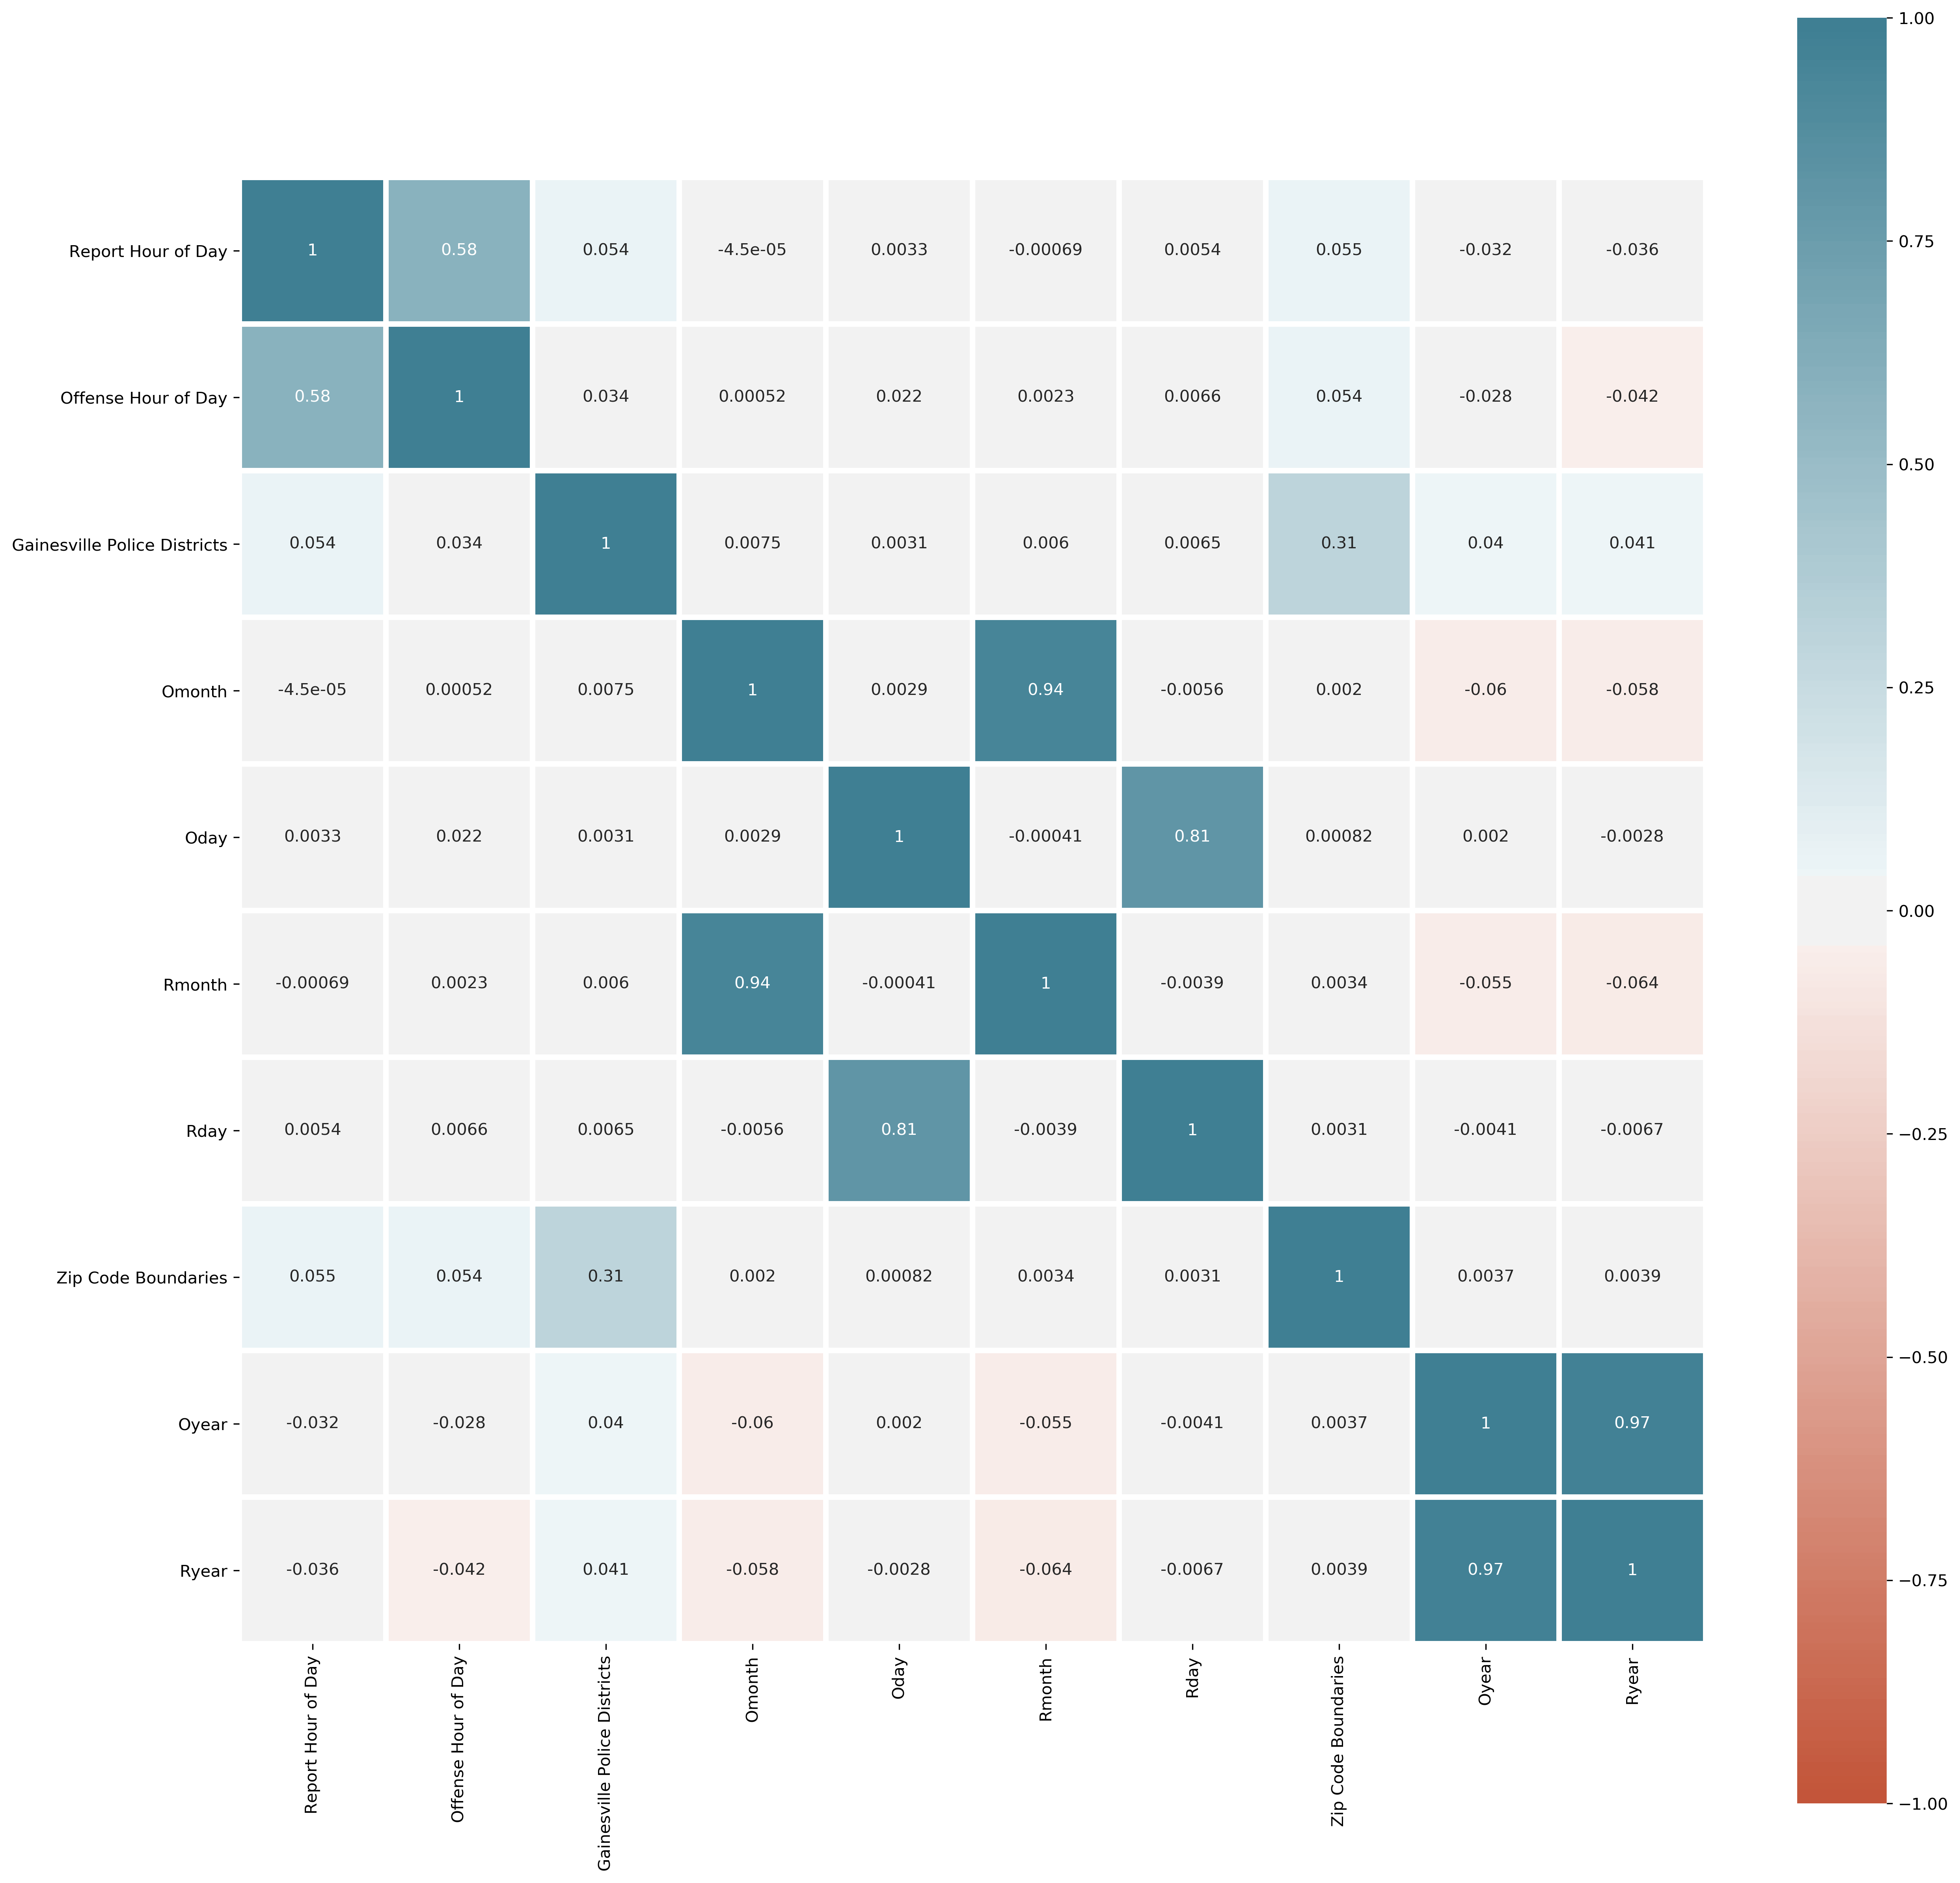

In [24]:
plt.figure(figsize = (20,20),dpi=300)
sns.heatmap(df[varscor].corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot = True, fmt='.2g',
            linewidths=3, linecolor='white',square=True, #cbar_kws= {'orientation': 'horizontal'}, 
            #mask=np.triu(df.corr())
           )
#plt.savefig("seaborn_heatmap_single_allvarables.png")

# Predictive Analytics
Select the top 5 incidents for further analysis

In [25]:
# file for top5 model
sum(df['Incident Type'].value_counts().iloc[:5])/len(df)


0.2250365536748415

In [26]:
list = df['Incident Type'].value_counts().iloc[:5].index
list

Index(['Theft Petit - Retail', 'Trespass Warning', 'Burglary to Conveyance',
       'Theft Petit - Other', 'Criminal Mischief (misdemeanor)'],
      dtype='object')

In [27]:


df2=df[df['Incident Type'].isin(list)]

df2.duplicated().sum()

df2.drop_duplicates(keep=False,inplace=True)
df2=df2.drop(columns=['Commission Districts'])

df2=df2.dropna(how='any')

set(df2['Incident Type'])

{'Burglary to Conveyance',
 'Criminal Mischief (misdemeanor)',
 'Theft Petit - Other',
 'Theft Petit - Retail',
 'Trespass Warning'}

In [28]:
df2.shape

(12326, 36)

In [29]:
#save file
df2.to_csv ('cityforML5top.csv', index = None, header=True)

# classfication

In [30]:
df=pd.read_csv('cityforML5top.csv', header=0)

In [31]:
df.columns

Index(['ID', 'Incident Type', 'Report Date', 'Offense Date',
       'Report Hour of Day', 'Report Day of Week', 'Offense Hour of Day',
       'Offense Day of Week', 'City', 'State', 'Address', 'Latitude',
       'Longitude', 'Zip Code Boundaries', 'Location', '2010 Census Tracts',
       'Gainesville Police Districts', 'Florida Census Zip Codes',
       'Gainesville Enterprise Zone Boundaries', 'GPD Zones',
       'Gainesville Fire Response Districts', 'OffenseDate', 'ReportDate',
       'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour', 'DRmonth', 'delay',
       'Oyear', 'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday'],
      dtype='object')

In [32]:
df['Report Day of Week'] = df['Report Day of Week'].astype('category').cat.as_ordered()

df['Offense Day of Week'] = df['Offense Day of Week'].astype('category').cat.as_ordered()

In [33]:
from sklearn.model_selection import train_test_split 
#X=df.loc[:,df.columns!='Incident Type',]
#X=df.drop(columns=['Incident Type','ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour', 'DRmonth',    'OffenseDate', 'ReportDate' ])
#X=df[['delay', 'Report Hour of Day', 'Offense Hour of Day', 'Longitude', 'Latitude', '2010 Census Tracts',     'Gainesville Police Districts', 'Gainesville Fire Response Districts']]
X=df[['delay', 'Offense Hour of Day', 'Report Hour of Day', 'Gainesville Police Districts', 'Gainesville Fire Response Districts','Oyear', 'Ryear']]
Y= df['Incident Type']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=123)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

RandomF = RandomForestClassifier(max_depth=5, n_estimators=100000, max_features=1)
RandomF.fit(X_train, Y_train)
RandomF_pred = RandomF.predict(X_test)

confusionMatrix = confusion_matrix(y_true=Y_test, y_pred=RandomF_pred)
cm=pd.DataFrame(confusionMatrix.T, index=RandomF.classes_, columns=RandomF.classes_)

print('Testing Accuarcy of  RandomForest is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred=RandomF_pred))

Testing Accuarcy of  RandomForest is: 0.502
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.46      0.28      0.35       365
Criminal Mischief (misdemeanor)       0.39      0.17      0.24       414
            Theft Petit - Other       0.43      0.40      0.42       426
           Theft Petit - Retail       0.49      0.76      0.59       596
               Trespass Warning       0.60      0.67      0.63       665

                       accuracy                           0.50      2466
                      macro avg       0.47      0.45      0.44      2466
                   weighted avg       0.49      0.50      0.48      2466



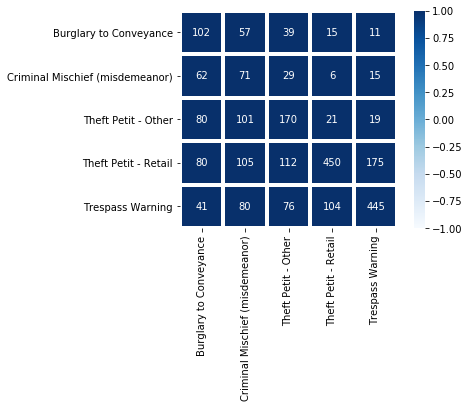

In [35]:
sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)    


In [36]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':X.columns, 'importance':RandomF.feature_importances_}).sort_values(['importance'], ascending=[0])

,feature,importance
0,delay,0.411720
3,Gainesville Police Districts,0.130473
4,Gainesville Fire Response Districts,0.129465
1,Offense Hour of Day,0.118361
2,Report Hour of Day,0.118126
5,Oyear,0.046181
6,Ryear,0.045674


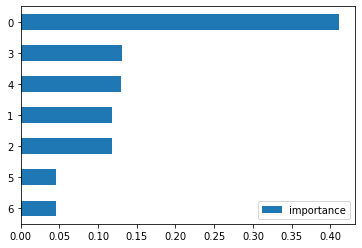

In [37]:
pd.DataFrame({'feature':X.columns, 'importance':RandomF.feature_importances_}).sort_values(['importance']).plot(kind='barh')

In [38]:
# select variables for model by the importance of RF
from sklearn.preprocessing import StandardScaler
X=df[['delay', 'Offense Hour of Day', 'Report Hour of Day', 'Gainesville Police Districts']]
Y= df['Incident Type']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=123)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

Misclassified samples: 1554
Accuracy: 0.37
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.29      0.06      0.10       365
Criminal Mischief (misdemeanor)       0.09      0.02      0.04       414
            Theft Petit - Other       0.32      0.18      0.23       426
           Theft Petit - Retail       0.43      0.75      0.55       596
               Trespass Warning       0.35      0.54      0.43       665

                       accuracy                           0.37      2466
                      macro avg       0.30      0.31      0.27      2466
                   weighted avg       0.31      0.37      0.31      2466

time training: 0:00:00.232003


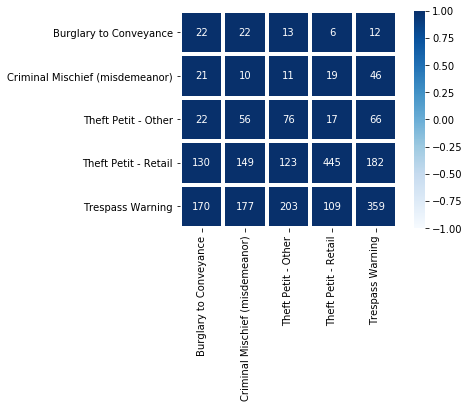

In [39]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
start = datetime.now()
Logmodel = LogisticRegression(solver = 'lbfgs',max_iter=10000,multi_class='ovr')
Logmodel.fit(X_train, Y_train)

# use the Logmodel to make predictions with the test data
y_pred = Logmodel.predict(X_test)
# how did our Logmodel perform?
count_misclassified = (Y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

confusionMatrix = confusion_matrix(Y_test, y_pred)
cm=pd.DataFrame(confusionMatrix.T, index=Logmodel.classes_, columns=Logmodel.classes_)
#print(cm)
print(classification_report(Y_test, y_pred))
sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)

print("time training:", datetime.now() - start)

Testing Accuarcy of  SVM is: 0.369
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.31      0.04      0.07       365
Criminal Mischief (misdemeanor)       0.20      0.01      0.03       414
            Theft Petit - Other       0.29      0.18      0.22       426
           Theft Petit - Retail       0.42      0.75      0.53       596
               Trespass Warning       0.35      0.55      0.43       665

                       accuracy                           0.37      2466
                      macro avg       0.31      0.31      0.26      2466
                   weighted avg       0.32      0.37      0.30      2466

time training: 0:02:35.936219


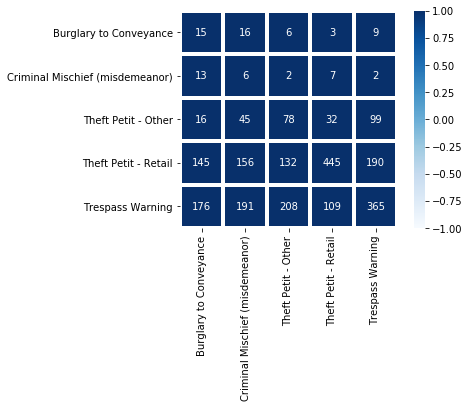

In [40]:
# SVM 
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
start = datetime.now()
svmmodel1 = OneVsRestClassifier(LinearSVC(random_state=0,max_iter=100000))
svmmodel1.fit(X_train, Y_train)
svmmodel1_pred = svmmodel1.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred=svmmodel1_pred)
cm=pd.DataFrame(confusionMatrix.T, index=svmmodel1.classes_, columns=svmmodel1.classes_)
#print(cm)
print('Testing Accuarcy of  SVM is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred=svmmodel1_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)     

print("time training:", datetime.now() - start)

The accuracy is not good. Adjust metircs and algorithm.

# Time series prediction
Use the top incident: 'Theft Petit - Retail'

In [41]:
df=df2[df2['Incident Type']=='Theft Petit - Retail']
df=df.rename(columns={"Incident Type": "Incident_Type"})

df=df.rename(columns={'Report Day of Week': 'Report_Day_of_Week', 'Report Hour of Day':'Report_Hour_of_Day',
'Offense Hour of Day': 'Offense_Hour_of_Day', 'Offense Day of Week': 'Offense_Day_of_Week'})
df.columns

Index(['ID', 'Incident_Type', 'Report Date', 'Offense Date',
       'Report_Hour_of_Day', 'Report_Day_of_Week', 'Offense_Hour_of_Day',
       'Offense_Day_of_Week', 'City', 'State', 'Address', 'Latitude',
       'Longitude', 'Zip Code Boundaries', 'Location', '2010 Census Tracts',
       'Gainesville Police Districts', 'Florida Census Zip Codes',
       'Gainesville Enterprise Zone Boundaries', 'GPD Zones',
       'Gainesville Fire Response Districts', 'OffenseDate', 'ReportDate',
       'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour', 'DRmonth', 'delay',
       'Oyear', 'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday'],
      dtype='object')

In [42]:
import sqlite3 as db
conn = db.connect('df_trial.db')
#c = conn.cursor()
df.to_sql('df', conn, if_exists='replace', index=False)
pd.read_sql_query('SELECT * FROM df LIMIT 2', conn)

,ID,Incident_Type,Report Date,Offense Date,Report_Hour_of_Day,Report_Day_of_Week,Offense_Hour_of_Day,Offense_Day_of_Week,City,State,...,RDate,DRhour,DRmonth,delay,Oyear,Omonth,Oday,Ryear,Rmonth,Rday
0,220002498,Theft Petit - Retail,02/14/2020 04:47:00 PM,01/11/2020 12:00:00 AM,16,5,0,6,GAINESVILLE,FL,...,2020-02-14,2020-Feb-14 16,2020-Feb,34.699306,2020,1,11,2020,2,14
1,219020110,Theft Petit - Retail,12/04/2019 10:46:00 AM,12/04/2019 10:45:59 AM,10,3,10,3,GAINESVILLE,FL,...,2019-12-04,2019-Dec-04 10,2019-Dec,0.000012,2019,12,4,2019,12,4



Five random records from the `dfReport_Hour_of_Day` table:


,Report_Hour_of_Day,countReport_Hour_of_Day
9,9,77
11,11,179
3,3,41
1,1,64
5,5,21


Text(0.5, 1.0, 'Time Series of count by Report_Hour_of_Day')

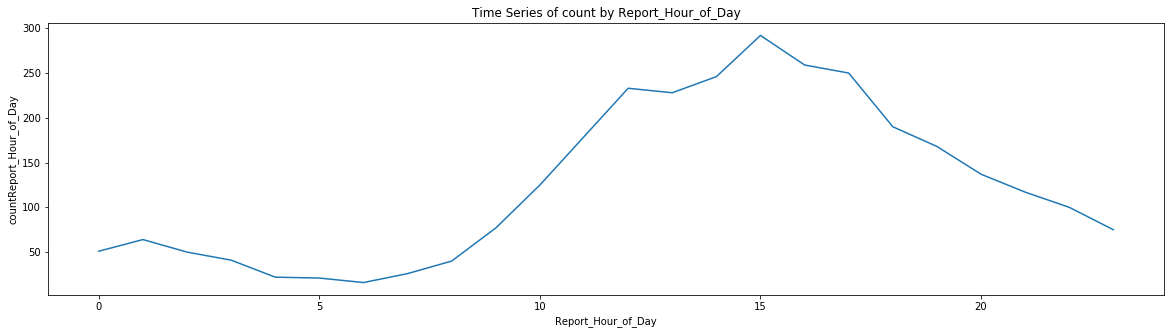

In [43]:
query = '''
    select  Report_Hour_of_Day, count(Incident_Type) as countReport_Hour_of_Day    
    from df
    where Oyear!=2020
    group by Report_Hour_of_Day
    order by Report_Hour_of_Day
'''
dfReport_Hour_of_Day = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfReport_Hour_of_Day` table:")
display(dfReport_Hour_of_Day.iloc[np.random.choice (len (dfReport_Hour_of_Day), 5)])
plt.figure(figsize=(20,5))
g=sns.lineplot(x='Report_Hour_of_Day', y='countReport_Hour_of_Day', data=dfReport_Hour_of_Day)
g.set_title('Time Series of count by Report_Hour_of_Day')


Five random records from the `dfReport_Day_of_Week` table:


,Report_Day_of_Week,countReport_Day_of_Week
5,6,468
4,5,416
1,2,446
0,1,403
2,3,405


Text(0.5, 1.0, 'Time Series of count by Report_Day_of_Week')

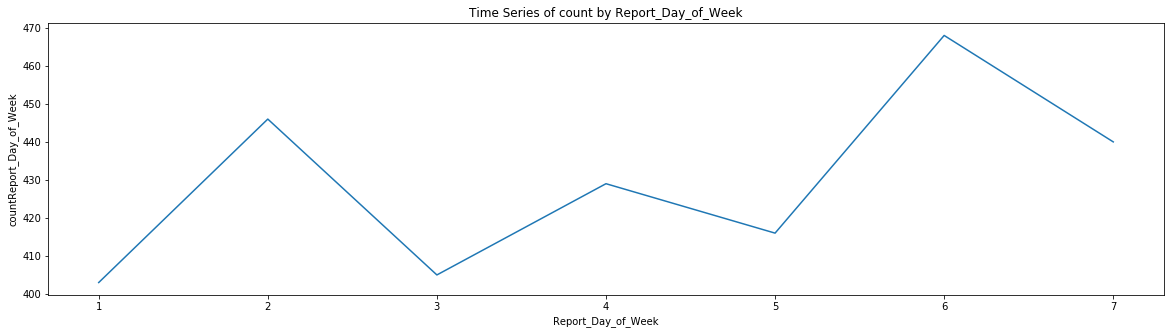

In [44]:
query = '''
    select  Report_Day_of_Week, count(Incident_Type) as countReport_Day_of_Week    
    from df 
    where Oyear!=2020
    group by Report_Day_of_Week
    order by Report_Day_of_Week
'''
dfReport_Day_of_Week = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfReport_Day_of_Week` table:")
display(dfReport_Day_of_Week.iloc[np.random.choice (len (dfReport_Day_of_Week), 5)])
plt.figure(figsize=(20,5))
g=sns.lineplot(x='Report_Day_of_Week', y='countReport_Day_of_Week', data=dfReport_Day_of_Week)
g.set_title('Time Series of count by Report_Day_of_Week')

In [45]:
query = '''
    select  RDate, count(Incident_Type) as countRdate    
    from df 
     where Oyear!=2020 and Oyear!=2019
    group by RDate
    order by RDate
'''
dfRDate = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfRDate` table:")
display(dfRDate.iloc[np.random.choice (len (dfRDate), 5)])


Five random records from the `dfRDate` table:


,RDate,countRdate
788,2014-10-01,1
1246,2016-12-19,2
1658,2018-11-05,1
945,2015-07-14,1
559,2013-08-11,1


In [46]:
query = '''
    select  RDate, count(Incident_Type) as countRdate    
    from df 
    where Oyear=2020 or Oyear=2019
    group by RDate
    order by RDate
'''
testfull = pd.read_sql_query (query, conn)
### END SOLUTION
testfull

,RDate,countRdate
0,2019-01-03,1
1,2019-01-04,1
2,2019-01-05,1
3,2019-01-07,2
4,2019-01-08,1
...,...,...
241,2020-03-23,2
242,2020-03-28,1
243,2020-03-29,1
244,2020-03-31,1


Text(0.5, 1.0, 'Time Series of Theft Petit - Retail by Rdate of search')

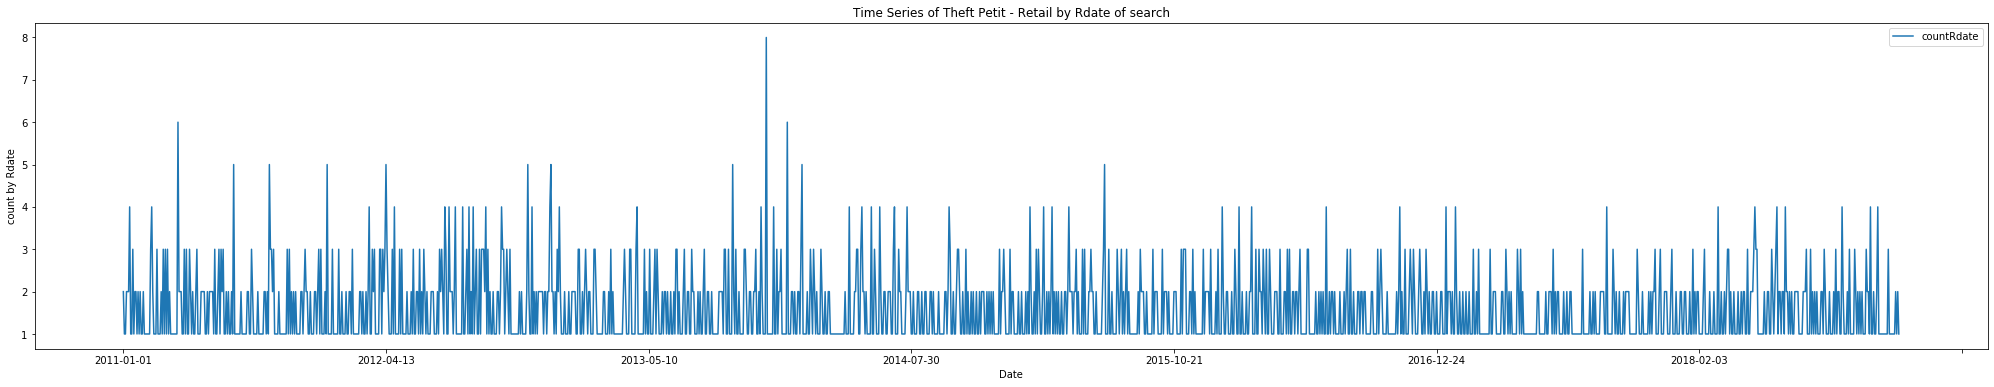

In [47]:
dfRDate.plot(x="RDate", y='countRdate', figsize=(35,6))
plt.xlabel('Date')
plt.ylabel('count by Rdate')
plt.title('Time Series of Theft Petit - Retail by Rdate of search')



Five random records from the `dfDRmonth` table:


,DRmonth,countDRmonth
45,2014-Nov,20
8,2011-May,28
90,2018-Jun,29
24,2013-Apr,33
15,2012-Feb,17


Text(0.5, 1.0, 'Time Series of Theft Petit - Retail byDRmonth of search')

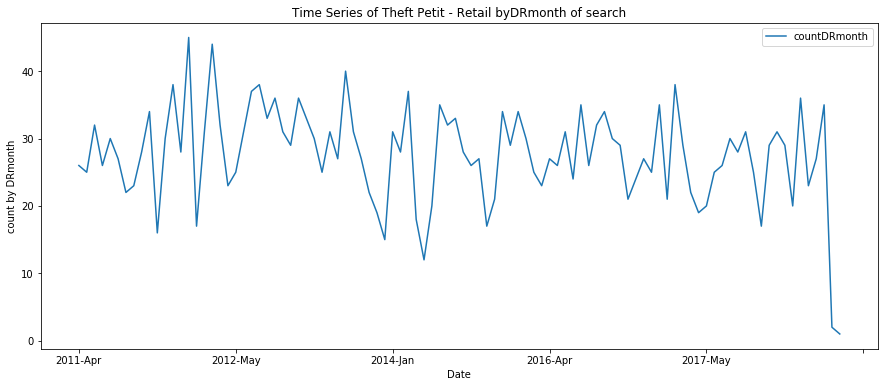

In [48]:
query = '''
    select  DRmonth, count(Incident_Type) as countDRmonth    
    from df 
    where Oyear!=2020 and Oyear!=2019
    
    group by  DRmonth
    order by DRmonth
'''
dfDRmonth = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfDRmonth` table:")
display(dfDRmonth.iloc[np.random.choice (len (dfDRmonth), 5)])
dfDRmonth.plot(x="DRmonth", y='countDRmonth', figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('count by DRmonth')
plt.title('Time Series of Theft Petit - Retail byDRmonth of search')

In [49]:
query = '''
    select  DRmonth, count(Incident_Type) as countDRmonth    
    from df 
    where Oyear=2020 or Oyear=2019
    
    group by  DRmonth
    order by DRmonth
'''
testmonth = pd.read_sql_query (query, conn)
### END SOLUTION

In [52]:
dfDRmonth['DRmonth'] = pd.DatetimeIndex(pd.to_datetime(dfDRmonth['DRmonth'], format='%Y-%b'))
dfDRmonth=dfDRmonth.sort_values(by='DRmonth')

dfDRmonthindex=dfDRmonth.set_index('DRmonth')


testmonth['DRmonth'] = pd.DatetimeIndex(pd.to_datetime(testmonth['DRmonth'], format='%Y-%b'))
testmonth=testmonth.sort_values(by='DRmonth')
testmonth=testmonth.set_index('DRmonth')
testmonth=testmonth.sort_index(ascending=True)

train=dfDRmonthindex.copy()
test=testmonth.copy()
test=test.sort_index(ascending=True)

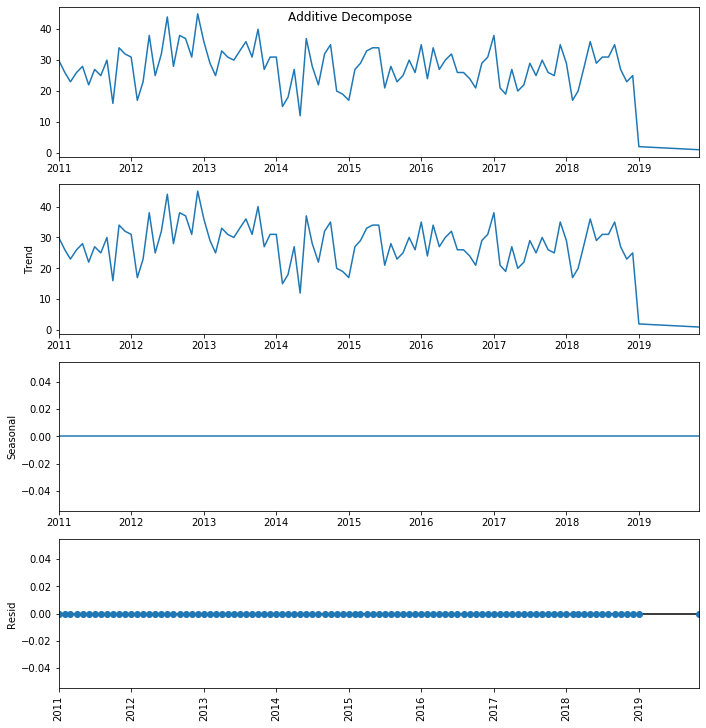

In [53]:
#decompose data
import warnings
warnings.simplefilter('ignore');
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
# Multiplicative Decomposition 
#result_mul = seasonal_decompose(train, model='multiplicative', freq=1)
# Additive Decomposition
result_add = seasonal_decompose(train, model='additive', freq=1)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
#result_mul.plot().suptitle('Multiplicative Decompose')
#plt.xticks(rotation=90)
result_add.plot().suptitle('Additive Decompose')
plt.xticks(rotation=90)
plt.show()

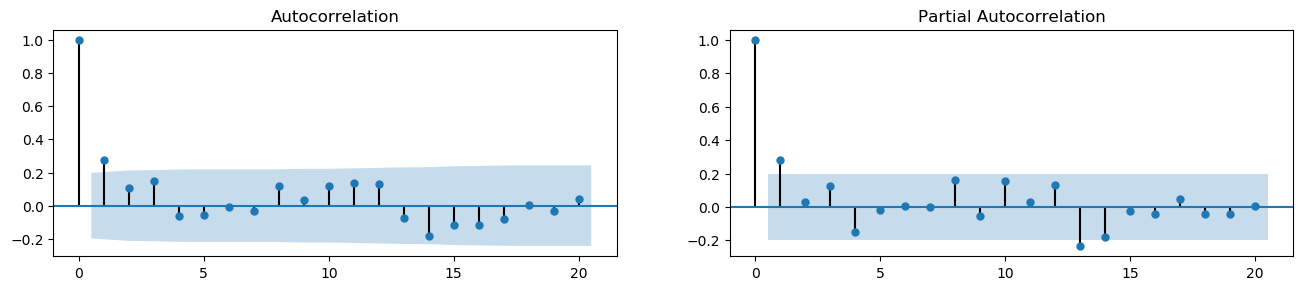

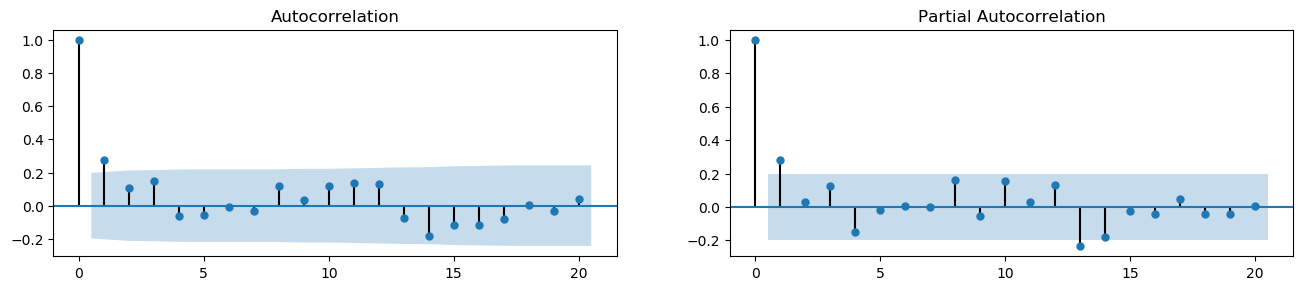

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train, ax=axes[0])
plot_pacf(train,  ax=axes[1])

In [55]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3253      0.136      2.386      0.017       0.058       0.592
ma.L1         -1.0000    886.811     -0.001      0.999   -1739.118    1737.118
ar.S.L12      -0.0037      0.004     -0.867      0.386      -0.012       0.005
ma.S.L12      -1.0000    886.267     -0.001      0.999   -1738.051    1736.051
sigma2        42.2047     21.646      1.950      0.051      -0.220      84.630


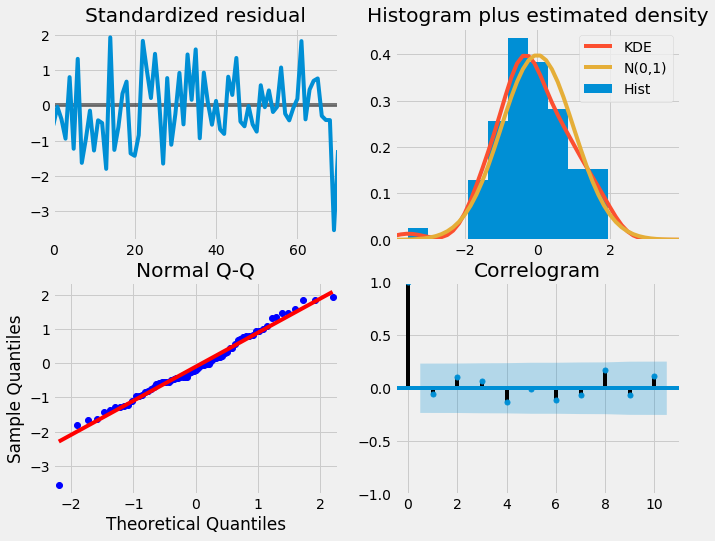

In [56]:
results.plot_diagnostics(figsize=(10, 8))
plt.show()

In [57]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(1,1,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=False)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(16, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

                             ARIMA Model Results                              
Dep. Variable:         D.countDRmonth   No. Observations:                   97
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -326.481
Method:                       css-mle   S.D. of innovations              6.865
Date:                Tue, 11 Aug 2020   AIC                            660.962
Time:                        13:00:23   BIC                            671.260
Sample:                             1   HQIC                           665.126
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0634      0.035     -1.825      0.068      -0.131       0.005
ar.L1.D.countDRmonth     0.3004      0.105      2.873      0.004       0.095       0.505
ma.L1.D.coun

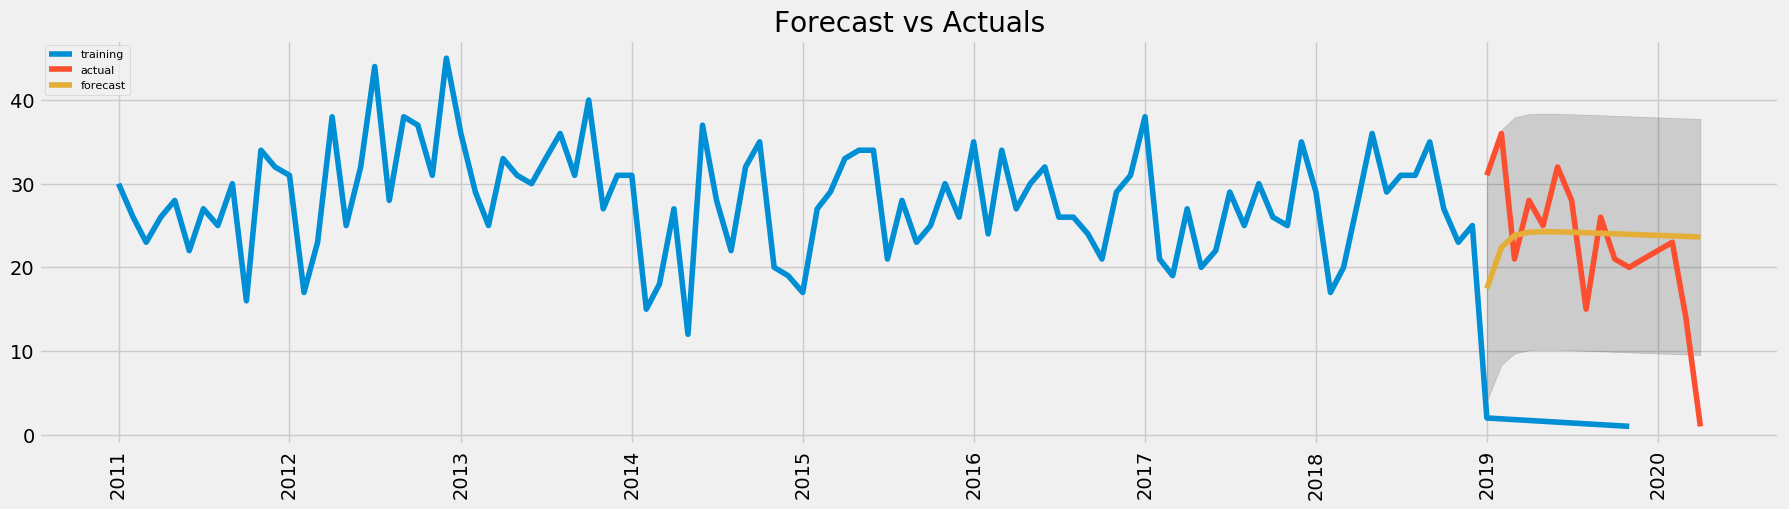

In [58]:
# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, fc_series)
print('Test MSE: %.3f' % error)


Test MSE: 74.740
